In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
works = pd.read_csv('../data/works.csv')
tags = pd.read_csv('../data/tags.csv')

def tags_dict():
    print("tags data dict:")
    print("tag ID")
    print("tag type (e.g. Warning, Fandom, Relationship)")
    print("tag name (unless the tag has fewer than 5 uses)")
    print("canonical or not")
    print("an approximate number of uses")
    print("merger ID (i.e. the tag's canonical version, if it has one)")


def works_dict():
    print("works data dict:")
    print("creation date")
    print("language")
    print("word count")
    print("restricted or not")
    print("complete or not")
    print("associated tag IDs")

In [3]:
hp_tag = tags.loc[tags['type'] == 'Fandom'].sort_values(by='cached_count', ascending=False)['id'].values[0]
hp_tag

136512

In [4]:
hp_works = works.loc[works['tags'].astype('string').str.contains(str(hp_tag))]
hp_works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
30,2021-02-26,en,False,True,37.0,9+136512+17106+11235+572192+21+14,NaN
45,2021-02-26,en,False,True,1608.0,13+136512+10760+1048+1589+2174+2157+974+2211+1...,NaN
107,2021-02-26,en,False,False,2900.0,10+136512+1110+89592+93721+1754932+4429418+23+16,NaN
147,2021-02-26,en,False,False,1404.0,11+136512+33035890+26740493+24757434+11987966+...,NaN
175,2021-02-26,en,False,True,3310.0,9+136512+15993+396+2927+315707+21+16,NaN
...,...,...,...,...,...,...,...
7268022,2008-11-18,en,True,True,9292.0,23+183+3868+3869+3844+2175+16+3845+3846+182+38...,NaN
7268023,2008-11-18,en,True,True,3344.0,23+183+3872+3844+2211+215+989+16+3808+1172+385...,NaN
7268036,2008-11-16,en,True,True,1381.0,23+183+1803+2211+16+62+2099+3803+60+11+3814+29...,NaN
7268123,2008-11-12,en,True,True,7408.0,23+183+3515+966+16+180+12+3805+3806+3807+3507+...,NaN


In [5]:
hp_works['sm_date'] = hp_works['creation date'].astype('string').str[0:7]
hp_works

C:\Users\isiyb\AppData\Local\Temp\ipykernel_19672\3779123634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_works['sm_date'] = hp_works['creation date'].astype('string').str[0:7]


,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,sm_date
30,2021-02-26,en,False,True,37.0,9+136512+17106+11235+572192+21+14,NaN,2021-02
45,2021-02-26,en,False,True,1608.0,13+136512+10760+1048+1589+2174+2157+974+2211+1...,NaN,2021-02
107,2021-02-26,en,False,False,2900.0,10+136512+1110+89592+93721+1754932+4429418+23+16,NaN,2021-02
147,2021-02-26,en,False,False,1404.0,11+136512+33035890+26740493+24757434+11987966+...,NaN,2021-02
175,2021-02-26,en,False,True,3310.0,9+136512+15993+396+2927+315707+21+16,NaN,2021-02
...,...,...,...,...,...,...,...,...
7268022,2008-11-18,en,True,True,9292.0,23+183+3868+3869+3844+2175+16+3845+3846+182+38...,NaN,2008-11
7268023,2008-11-18,en,True,True,3344.0,23+183+3872+3844+2211+215+989+16+3808+1172+385...,NaN,2008-11
7268036,2008-11-16,en,True,True,1381.0,23+183+1803+2211+16+62+2099+3803+60+11+3814+29...,NaN,2008-11
7268123,2008-11-12,en,True,True,7408.0,23+183+3515+966+16+180+12+3805+3806+3807+3507+...,NaN,2008-11


In [6]:
hp_sm_dates = hp_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()
hp_sm_dates

,sm_date,count
0,2008-11,10
1,2009-02,6
2,2009-04,2
3,2009-05,1
4,2009-09,1
...,...,...
137,2020-10,5435
138,2020-11,5128
139,2020-12,6246
140,2021-01,6142


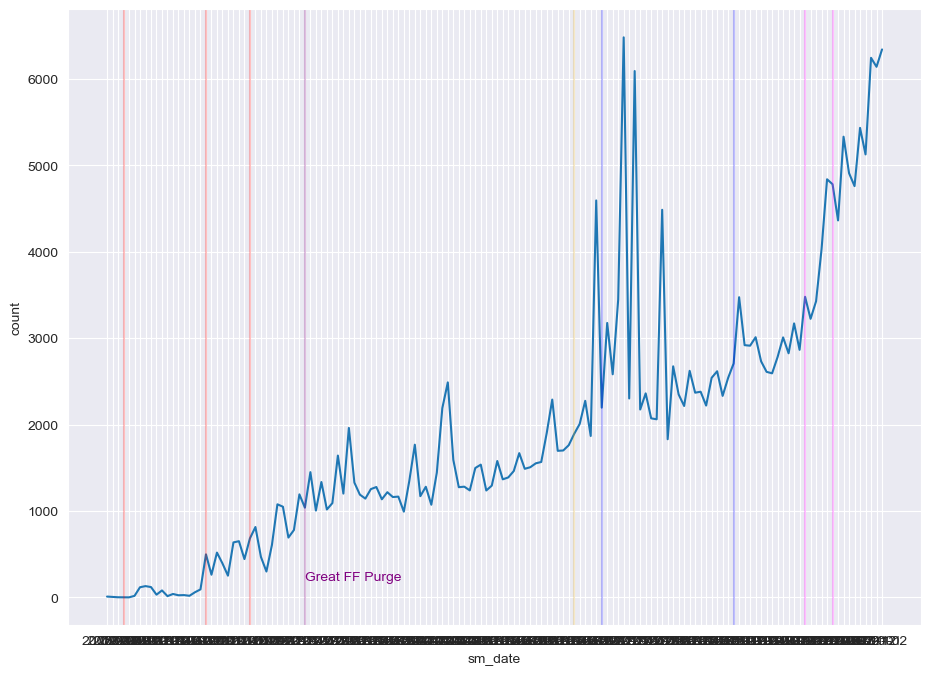

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=hp_sm_dates, x=hp_sm_dates['sm_date'], y=hp_sm_dates['count'])
plt.axvline('2012-05', color='purple', label='Great FF Purge', alpha=0.25)
plt.text(x = '2012-05', y = 200, s = 'Great FF Purge', color = 'purple')
plt.axvline(x='2009-05', color='red', alpha=0.25)
plt.axvline(x='2010-11', color='red', alpha=0.25)
plt.axvline(x='2011-07', color='red', alpha=0.25)
plt.axvline(x='2016-11', color='blue', alpha=0.25)
plt.axvline(x='2018-11', color='blue', alpha=0.25)
plt.axvline(x='2016-06', color='goldenrod', alpha=0.25)
plt.axvline(x='2020-05', color='magenta', alpha=0.25)
plt.axvline(x='2019-12', color='magenta', alpha=0.25)
plt.show()

In [9]:
hp_works['year'] = hp_works['creation date'].astype('string').str[:4]
hp_works

C:\Users\isiyb\AppData\Local\Temp\ipykernel_19672\2598789734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_works['year'] = hp_works['creation date'].astype('string').str[:4]


,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,sm_date,year
30,2021-02-26,en,False,True,37.0,9+136512+17106+11235+572192+21+14,NaN,2021-02,2021
45,2021-02-26,en,False,True,1608.0,13+136512+10760+1048+1589+2174+2157+974+2211+1...,NaN,2021-02,2021
107,2021-02-26,en,False,False,2900.0,10+136512+1110+89592+93721+1754932+4429418+23+16,NaN,2021-02,2021
147,2021-02-26,en,False,False,1404.0,11+136512+33035890+26740493+24757434+11987966+...,NaN,2021-02,2021
175,2021-02-26,en,False,True,3310.0,9+136512+15993+396+2927+315707+21+16,NaN,2021-02,2021
...,...,...,...,...,...,...,...,...,...
7268022,2008-11-18,en,True,True,9292.0,23+183+3868+3869+3844+2175+16+3845+3846+182+38...,NaN,2008-11,2008
7268023,2008-11-18,en,True,True,3344.0,23+183+3872+3844+2211+215+989+16+3808+1172+385...,NaN,2008-11,2008
7268036,2008-11-16,en,True,True,1381.0,23+183+1803+2211+16+62+2099+3803+60+11+3814+29...,NaN,2008-11,2008
7268123,2008-11-12,en,True,True,7408.0,23+183+3515+966+16+180+12+3805+3806+3807+3507+...,NaN,2008-11,2008


In [10]:
hp_works_years = hp_works['year'].value_counts().to_frame().sort_values(by='year').reset_index()

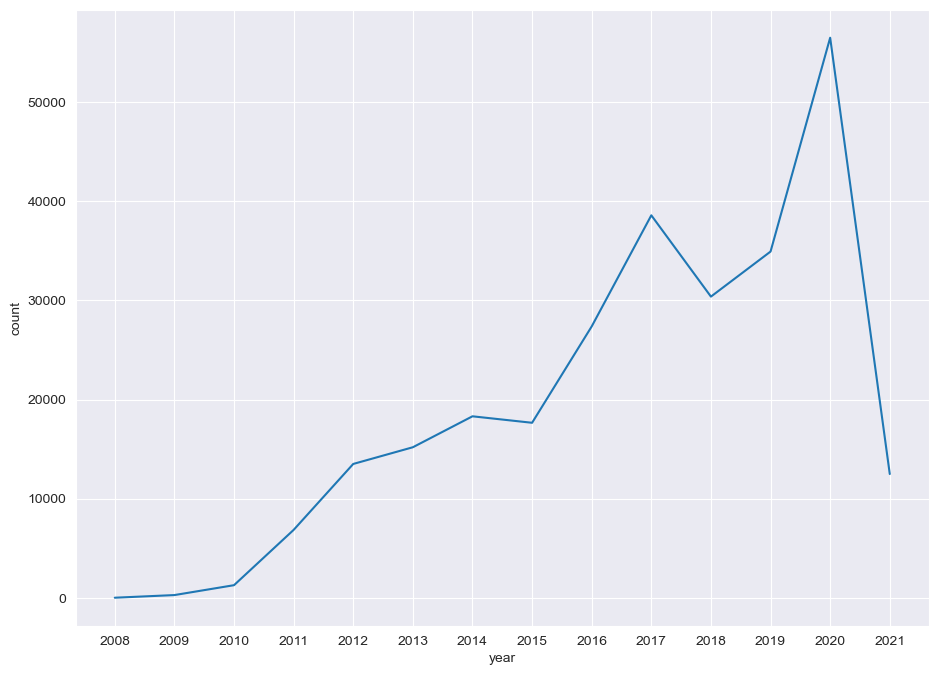

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=hp_works_years, x=hp_works_years['year'], y=hp_works_years['count'])
plt.show()

In [13]:
tags.loc[tags['type'] == 'Fandom'].sort_values(by='cached_count', ascending=False)

,id,type,name,canonical,cached_count,merger_id
94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
25,27,Fandom,Supernatural,True,310300,NaN
230408,414093,Fandom,Marvel Cinematic Universe,True,240536,NaN
1553725,3828398,Fandom,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,True,204096,NaN
680695,1002903,Fandom,방탄소년단 | Bangtan Boys | BTS,True,203097,NaN
...,...,...,...,...,...,...
9731584,37438366,Fandom,Redacted,False,0,2730336.0
9732014,37439944,Fandom,Moon Zero Two (1969),True,0,NaN
5313459,19686867,Fandom,Redacted,False,0,4122599.0
309932,520350,Fandom,Normal (2007),True,0,NaN
